# Aula 20 e 21 - Regressão Logística

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Visualizando a Função Logística

In [2]:
def logistic (x):
    logistic = 1/(1 + math.exp(-1*x))
    return logistic

In [3]:
#plotando o gráfico da função loística
x = np.linspace(-6,6,500)
y = np.array([logistic(value) for value in x])

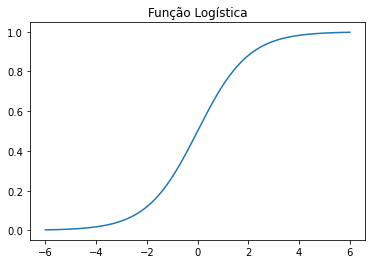

In [4]:
plt.plot(x,y)
plt.title("Função Logística")
plt.show()

In [5]:
import statsmodels.api as sm

df = sm.datasets.fair.load_pandas().data

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
df.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [8]:
#Transformando a coluna 'affairs' em variável categórica
#"Ou traiu, ou não traiu"

def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0
    
df["Had_Affair"] = df['affairs'].apply(affair_check)

In [9]:
df['Had_Affair']

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, Length: 6366, dtype: int64

In [11]:
#Groupby com a coluna criada, 'Had_affair'
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Plotando gráficos com Seaborn

In [14]:
import seaborn as sns
#Estilo de fundo possíveis: darkgrid, whitegrid, dark, white, ticks
sns.set_style('whitegrid')

<AxesSubplot:xlabel='age', ylabel='count'>

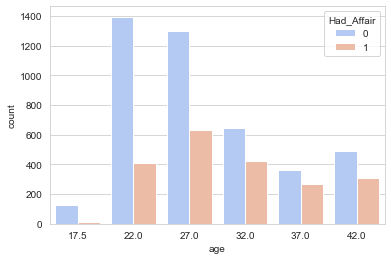

In [15]:
sns.countplot(x='age', data=df,
         hue='Had_Affair', palette='coolwarm')


<AxesSubplot:xlabel='children', ylabel='count'>

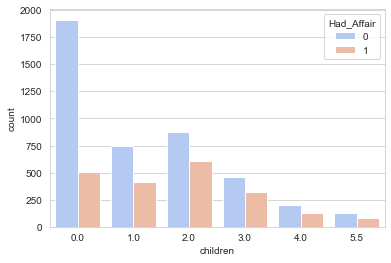

In [16]:
sns.countplot(x='children', data=df,
         hue='Had_Affair', palette='coolwarm')


<AxesSubplot:xlabel='educ', ylabel='count'>

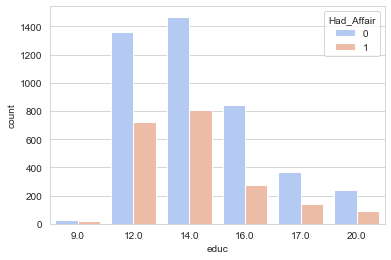

In [17]:
sns.countplot(x='educ', data=df,
         hue='Had_Affair', palette='coolwarm')


<AxesSubplot:xlabel='rate_marriage', ylabel='count'>

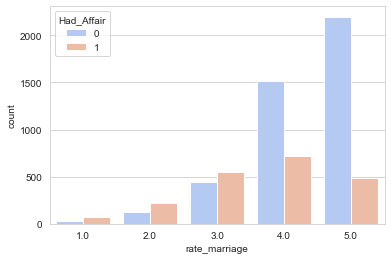

In [18]:
sns.countplot(x='rate_marriage', data=df,
         hue='Had_Affair', palette='coolwarm')


In [25]:
#Criação das dummy variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [26]:
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [27]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [28]:
hus_occ_dummies.head()

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [30]:
#Criando o Dataframe de features
X = df.drop(['occupation','occupation_husb','Had_Affair'], axis=1)

In [31]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [32]:
#:Concatenando os dataframes com dummy variables no X
X=pd.concat([X,dummies], axis=1)

In [34]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [35]:
y = df.Had_Affair

In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

Hipótese da Multicolienariedade